# Conhecimento sobre os dados e o negócio

## Variables explaned

* id - ID exclusivo para cada client
* Gender - Gênero do cliente
* Age - Idade do cliente
* Driving_License - 0 : Cliente não possui habilitação, 1 : Cliente já possui habilitação
* Region_Code - Código único para a região do cliente
* Previously_Insured - 1 : Cliente já possui Seguro de Veículo, 0 : Cliente não possui Seguro de Veículo
* Vehicle_Age - Idade do Veículo
* Vehicle_Damage - 1 : O cliente teve seu veículo danificado no passado. 0 : O cliente não teve seu veículo danificado no passado.
* Annual_Premium - O valor que o cliente precisa pagar como prêmio no ano
* Policy_Sales_Channel - Código anonimizado para o canal de divulgação ao cliente ou seja. Agentes diferentes, por correio, por telefone, pessoalmente, etc.
* Vintage - Número de dias, o cliente foi associado à empresa
* Response - 1 : O cliente está interessado, 0 : O cliente não está interessado

# 0.0 Imports

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

import os
import pathlib

from sklearn import preprocessing   as pp
from sklearn import metrics         as m
from sklearn import model_selection as ms
from sklearn import ensemble        as en
from sklearn import neighbors       as nh
from sklearn import linear_model    as lm


In [2]:
from IPython.core.display  import HTML
from IPython.display       import Image

import warnings
warnings.filterwarnings("ignore")

## 0.1 Helper Functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [8, 6]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

## 0.2 Variables

In [4]:
# Diretório raíz
PACKAGE_ROOT = pathlib.Path('.').resolve().parent

# Caminhos para os diretórios dos dados
DATADIR = os.path.join(PACKAGE_ROOT, 'data')
DATADIR_RAW = os.path.join(DATADIR, 'raw')
DATADIR_INTERIM = os.path.join(DATADIR, 'interim')
DATADIR_PREPROCESSED = os.path.join(DATADIR, 'preprocessed')

# Caminhos para os diretórios de documentos
DOCDIR = os.path.join(PACKAGE_ROOT, 'docs')
REPORTSDIR = os.path.join(PACKAGE_ROOT, 'reports')
REFERENCIESDIR = os.path.join(PACKAGE_ROOT,'references')
_mind_map = os.path.join(REFERENCIESDIR,'map_hipothesys.png')

# Files raw Data
_file_train = os.path.join(DATADIR_RAW,'train.csv')


## 0.3 Data Loading

In [5]:
df = pd.read_csv(_file_train)

# 1.0 Data General

In [6]:
df1 = df.copy()

## 1.1 Data info

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
df1.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


## 1.2 Check NA

In [9]:
df1.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## 1.3 Modifield Dtypes

In [10]:
df1.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [11]:
df1['Region_Code'] = df1['Region_Code'].astype('int64')
df1['Policy_Sales_Channel'] = df1['Policy_Sales_Channel'].astype('int64')

## 1.4 Descriptive Statistical

In [12]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [13]:
#num_attributes = df1.select_dtypes(include=['int64','float64'])
#cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

num_attributes = df1[['Age', 'Annual_Premium', 'Vintage']]

cat_attributes = df1[['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
                      'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']]

### 1.4.1 Numerical Attributes

In [14]:
skew = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ))
kurtosis = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() ))
range_minmax = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() ))
describe = pd.DataFrame(num_attributes.describe()).T
describe['range'] = range_minmax
describe['skew'] = skew
describe['kurtosis'] = kurtosis
describe = describe.reset_index()
describe = describe.rename(columns={'index':'Attributes'})
describe.set_index(['Attributes']).T

Attributes,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000
range,65.000000,537535.000000,289.000000
skew,0.672539,1.766087,0.003030


### 1.4.2 Categorical Attributes

In [15]:
cat_attributes.apply(lambda x: x.unique().shape[0])

Gender                    2
Driving_License           2
Region_Code              53
Previously_Insured        2
Vehicle_Age               3
Vehicle_Damage            2
Policy_Sales_Channel    155
Response                  2
dtype: int64

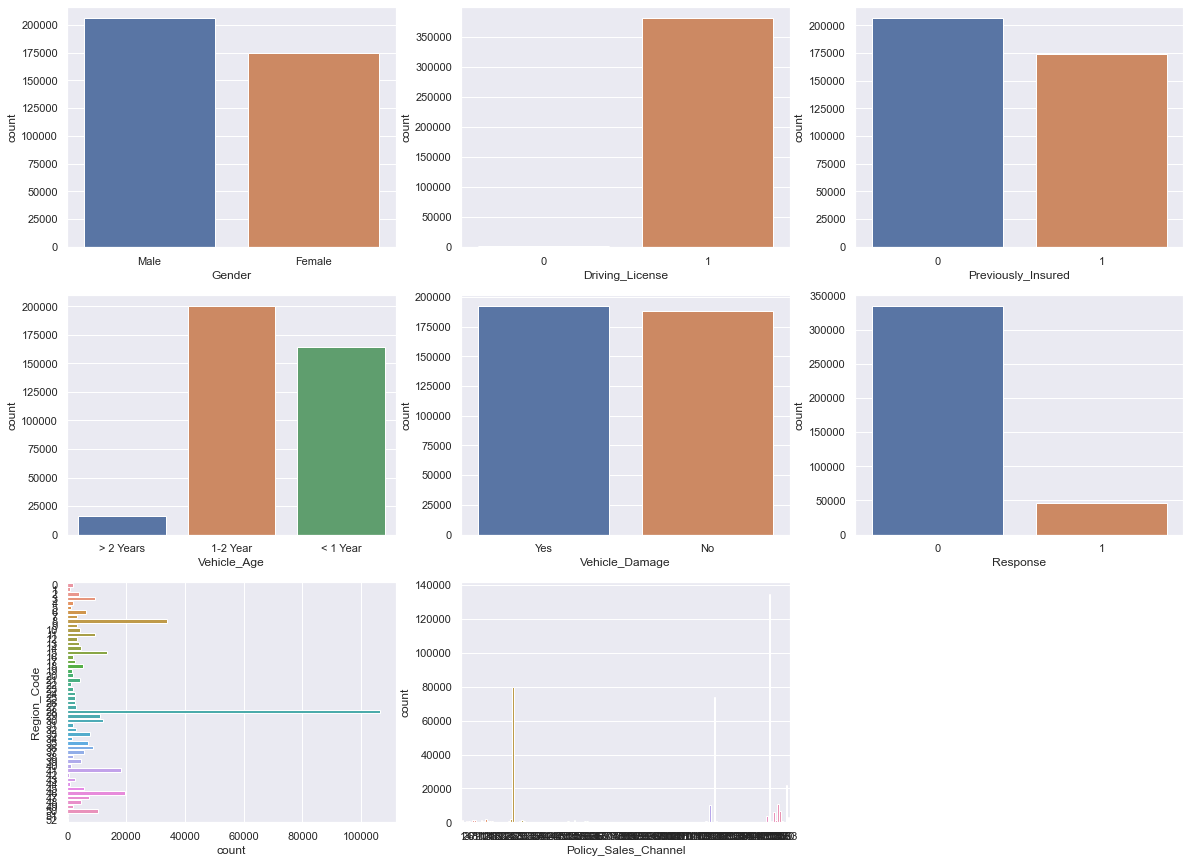

In [16]:
aux = df1.copy()

plt.figure(figsize = [20,15])
plt.subplot(3,3,1)
sns.countplot(x=aux['Gender'])

plt.subplot(3,3,2)
sns.countplot(x=aux['Driving_License'])

plt.subplot(3,3,3)
sns.countplot(x=aux['Previously_Insured'])

plt.subplot(3,3,4)
sns.countplot(x=aux['Vehicle_Age'])

plt.subplot(3,3,5)
sns.countplot(x=aux['Vehicle_Damage'])

plt.subplot(3,3,6)
sns.countplot(x=aux['Response'])


plt.subplot(3,3,7)
sns.countplot(y=aux['Region_Code'], orient='h')

plt.subplot(3,3,8)
sns.countplot(x=aux['Policy_Sales_Channel']);






# 2.0 Feature Engineering

In [17]:
df2 = df1.copy()

## 2.1 Mind Map Hypothesis



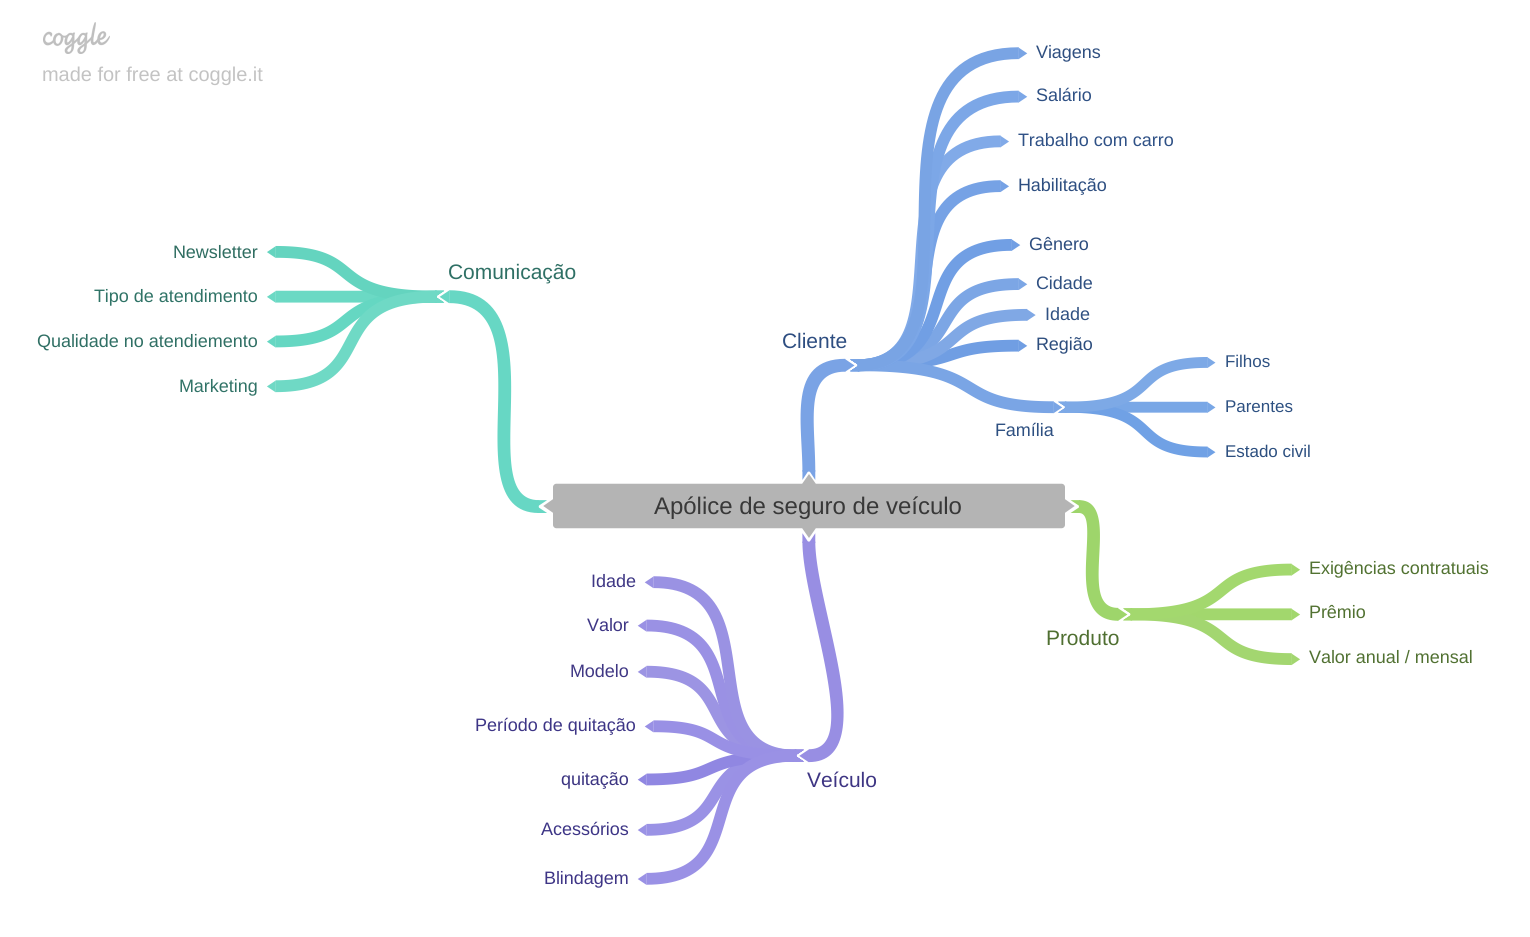

In [18]:
Image(_mind_map)

## 2.2 Hypotheses

### Veículo:

* H1 - Quanto menor a idade do veículo maior será a propensão de compra quando comparado com idades mais avançadas.
* H2 - Quanto maior o valor do veículo, os clientes tendem a comprar o seguro.
* H3 - Clientes que tem veículo na categoria de luxo são mais propensos a compra.
* H4 - Quanto maior o período de quitação do veículo maior será a propensão de compra do seguro.
* H5 - Clientes com carros quitados tendem a não comprar seguros.
* H6 - Clientes que possuem carros blindados tendem a comprar seguros.
* H7 - Clientes que possuem carros que já foram danificados no passado tendem a comprar seguro.

### Produto

* H8 - Contratos com muitas cláusulas tendem a vender menos apólice de seguro.
* H9 - Contratos com prêmios com grandes valores tendem a vender mais apólices.
* H10 - Apólice com valores mais baixos tendem a ser vendidas mais rapidamente.

### Clientes

* H11 - Clientes que viajam mais com seus veículos, tendem a comprar seguro.
* H12 - Clientes que fazem viagens mais longas tendem a comprar seguro.
* H13 - Clientes que trabalha com seu veículo tende a comprar seguro.
* H14 - Clientes que não tem habilitação tendem a comprar seguro em maior proporção daqueles que tem habilitação.
* H15 - Clientes que não possuem seguro de veículo tende a comprar mais quando comparado em proporção daqueles que tem seguro.
* H16 - Clientes entre 30 e 40 anos tendem a comprar mais seguro em comparação com outras idades.
* H17 - Clientes associados à empresa a mais tempo são mais propensos a compra de seguro quando comparado em proporção daqueles que tem menos tempo de associação.
* H18 - Homens tendem a comprar mais seguro.

## 2.3 Creating or changing features

In [19]:
#df2['Vehicle_Age'] = df2['Vehicle_Age'].apply( lambda x: 'over_2_years' if x=='> 2 Years' else 'between_1_2_years' if x=='1-2 Year' else 'below_1_year')

#df2['Vehicle_Damage'] = df2['Vehicle_Damage'].map({'Yes':1, 'No':0})

# 3.0 Data Filtering

In [20]:
df3 = df2.copy()

In [21]:
df3.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0


Não há nada de relevante para filtragem dos dados.

# 4.0 Exploratory Data Analysis

In [22]:
df4 = df3.copy()

Para Modelos de classificação, as features devem ser variáveis que possibilitem a projeção de um hiperplano que caracterize a separação das classes.

## 4.1 Bivariate analysis

### **H1 - Quanto menor a idade do veículo maior será a propensão de compra quando comparado com idades mais avançadas.**

- **Falsa** - Na verdade é demonstrado o contrário. 
- **Feature** - Vehicle_Age - Boa variável para o modelo

''

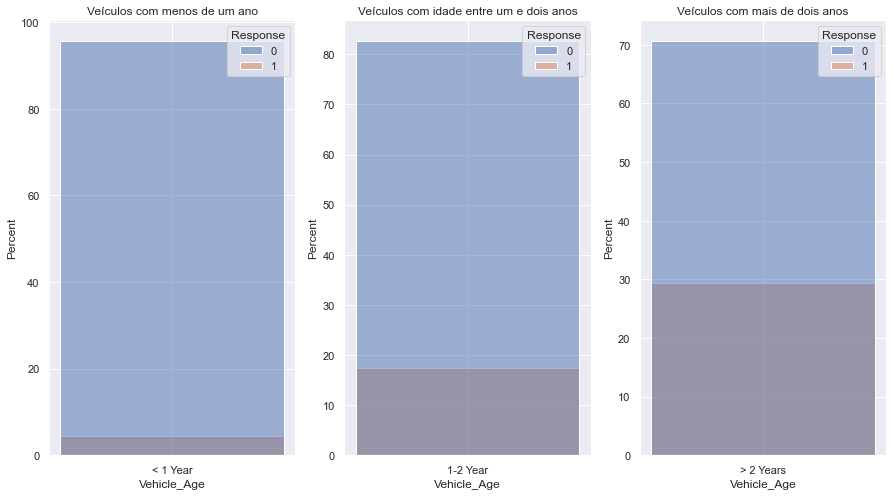

In [23]:
plt.figure(figsize = [15,8])
plt.subplot(1,3,1)
sns.histplot(x = 'Vehicle_Age', data=df4[df4['Vehicle_Age'] == '< 1 Year'], hue= 'Response', stat='percent')
plt.title('Veículos com menos de um ano')


plt.subplot(1,3,2)
sns.histplot(x = 'Vehicle_Age', data=df4[df4['Vehicle_Age'] == '1-2 Year'], hue= 'Response', stat='percent')
plt.title('Veículos com idade entre um e dois anos')


plt.subplot(1,3,3)
sns.histplot(x = 'Vehicle_Age', data=df4[df4['Vehicle_Age'] == '> 2 Years'], hue= 'Response', stat='percent')
plt.title('Veículos com mais de dois anos')
;

### **H7 - Clientes que possuem carros que já foram danificados no passado tendem a comprar seguro.**

- **VERDADEIRO** - Nesse dataset, 100% dos clientes que compraram seguro, tiveram o carro danificado.
- **Feature** - Variável ruim pois pode ocorrer vazamento de dados para o modelo (Viés para carros que já foram danificados).

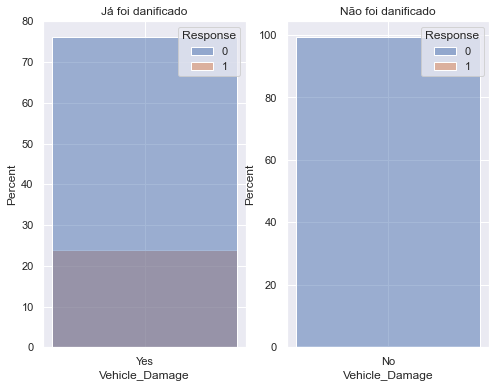

In [24]:
plt.subplot(1,2,1)
sns.histplot(x = 'Vehicle_Damage', data=df4[df4['Vehicle_Damage'] == 'Yes'], hue= 'Response', stat='percent')
plt.title('Já foi danificado')

plt.subplot(1,2,2)
sns.histplot(x = 'Vehicle_Damage', data=df4[df4['Vehicle_Damage'] == 'No'], hue= 'Response', stat='percent')
plt.title('Não foi danificado');

### **H10 - Apólice com valores mais baixos tendem a ser vendidas mais rapidamente.**

- **Falso** - O comportamento para as duas classes não há grande divergência. 
- **Feature** - Não é uma boa Feature. Isso ocorre porque o comportamento do shape é semelhante para baixo, médio e alto valores, logo não é tão discriminatório para o modelo.

''

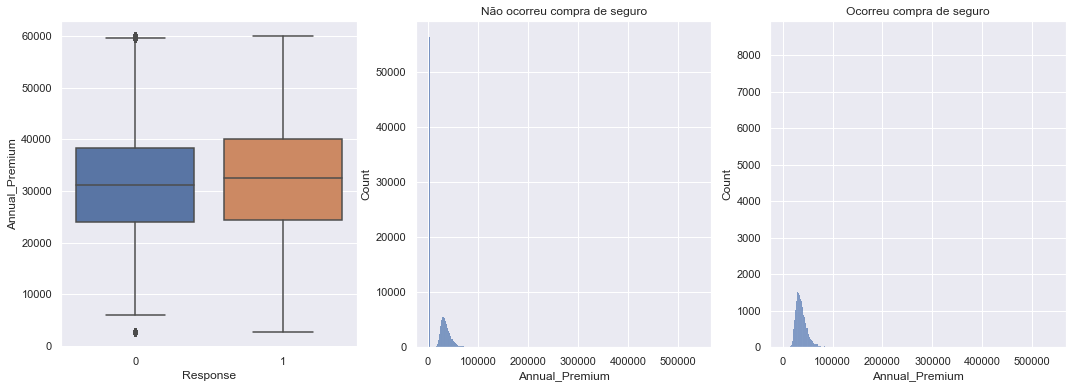

In [25]:
#Annual_Premium
plt.figure(figsize=[18,6])
plt.subplot(1,3,1)
sns.boxplot(x='Response', y='Annual_Premium', data=df4[df4['Annual_Premium']<60000])

plt.subplot(1,3,2)
sns.histplot(x='Annual_Premium', data=df4[df4['Response']==0])
plt.title('Não ocorreu compra de seguro')


plt.subplot(1,3,3)
sns.histplot(x='Annual_Premium', data=df4[df4['Response']==1] )
plt.title('Ocorreu compra de seguro')
;

### **H14 - Clientes que não tem habilitação tendem a comprar seguro em maior proporção daqueles que tem habilitação.**

- **Falsa** - Apenas alguns clientes que não tem habilitação compram seguro. 
- **Feature** - Uma boa feature para o modelo


''

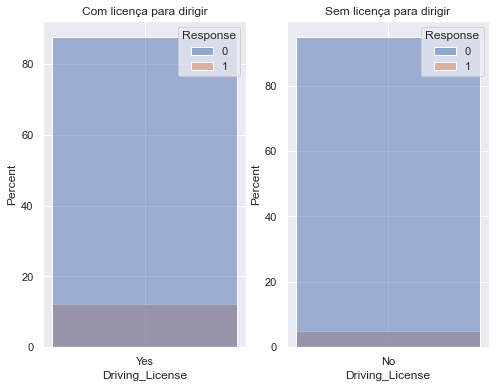

In [26]:
aux00 = df4[['Driving_License', 'Response']]
aux00['Driving_License'] = aux00['Driving_License'].map({0:'No', 1:'Yes'})

plt.subplot(1,2,1)
sns.histplot(x = 'Driving_License', data=aux00[aux00['Driving_License']=='Yes'], hue= 'Response', stat='percent')
plt.title('Com licença para dirigir')

plt.subplot(1,2,2)
sns.histplot(x = 'Driving_License', data=aux00[aux00['Driving_License']=='No'], hue= 'Response', stat='percent')
plt.title('Sem licença para dirigir')
;


### **H15 - Clientes que não possuem seguro de veículo tende a comprar mais quando comparado em proporção daqueles que tem seguro.**

- **VERDADEIRO** - Clientes que não possuem seguro tendem a comprar seguro com maior proporção daqueles que já tem seguro.
- **Feature** - Feature ruim pois pode ocorrer vazamento de dados (viés de confirmação para o modelo quando o cliente já possuir seguro.)

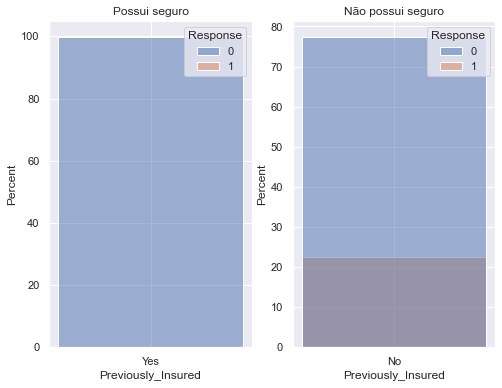

In [27]:
aux00 = df4[['Previously_Insured', 'Response']]
aux00['Previously_Insured'] = aux00['Previously_Insured'].map({0:'No', 1:'Yes'})

plt.subplot(1,2,1)
sns.histplot(x = 'Previously_Insured', data=aux00[aux00['Previously_Insured']=='Yes'], hue= 'Response', stat='percent')
plt.title('Possui seguro')

plt.subplot(1,2,2)
sns.histplot(x = 'Previously_Insured', data=aux00[aux00['Previously_Insured']=='No'], hue= 'Response', stat='percent')
plt.title('Não possui seguro');

### **H16 - Clientes entre 30 e 40 anos tendem a comprar mais seguro em comparação com outras idades.**
- **Verdadeiro** - Clientes nessa faixa etária tendem a comprar mais seguro do que em outras faixas. 
- **Feature** - Boa Feature para o modelo.

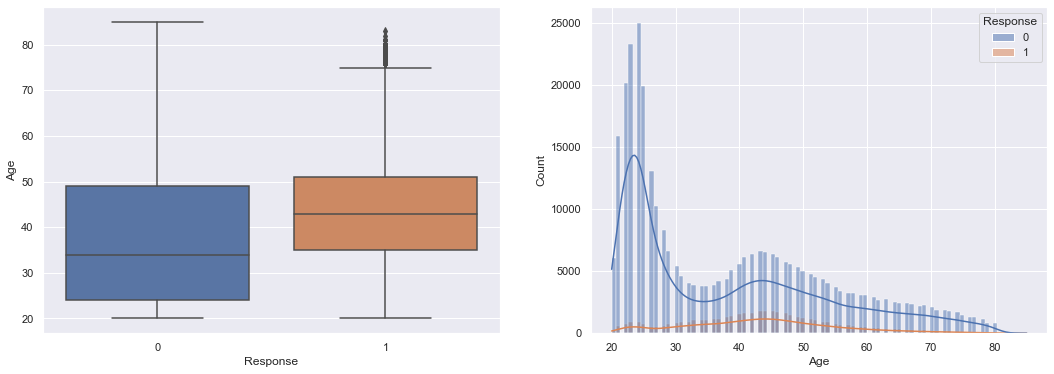

In [28]:
#Age
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
sns.boxplot(x='Response', y='Age', data=df4)

plt.subplot(1,2,2)
sns.histplot(x='Age', data=df4, hue='Response',  kde = True);

### **H17 - Clientes associados à empresa a mais tempo são mais propensos a compra de seguro quando comparado em proporção daqueles que tem menos tempo de associação.**

**Falso** - Não há uma distribuição que assimila essa hipótese como verdadeira. Inclusive, essa variável tem em suas classes comportamento semelhante para as classe de predição, logo essa feature não é tão boa para o modelo.

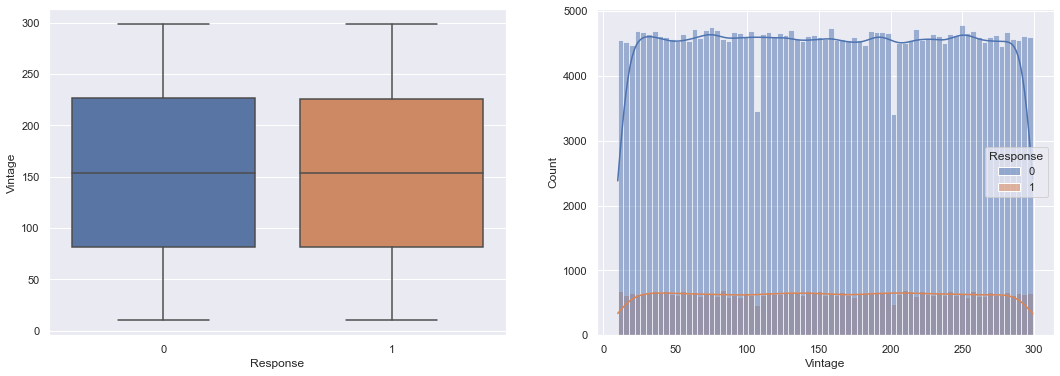

In [29]:
#Vintage
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
sns.boxplot(x='Response', y='Vintage', data=df4)

plt.subplot(1,2,2)
sns.histplot(x='Vintage', data=df4, hue='Response',  kde = True);

### **H18 - Homens tendem a comprar mais seguro em proporção às mulheres.**

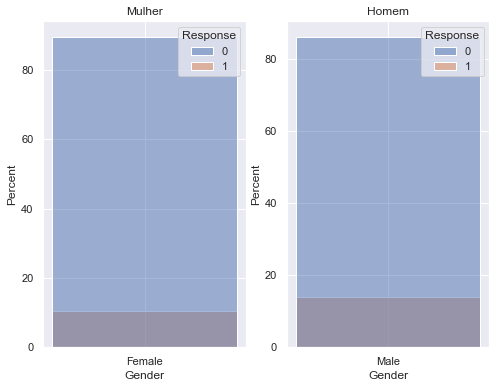

In [30]:
#Gender
plt.subplot(1,2,1)
sns.histplot(x = 'Gender', data=df4[df4['Gender'] == 'Female'], hue= 'Response', stat='percent')
plt.title('Mulher')

plt.subplot(1,2,2)
sns.histplot(x = 'Gender', data=df4[df4['Gender'] == 'Male'], hue= 'Response', stat='percent')
plt.title('Homem');

- Pode ser que os mais novos tenham menos tendência a comprarem seguros

### Region Code

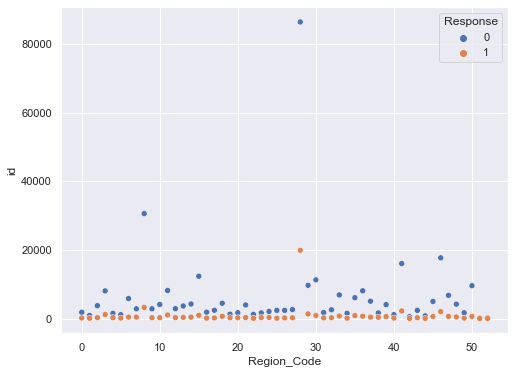

In [31]:
#Region_code

aux00 = df4[['Response', 'Region_Code']]
aux00['id'] = 1
aux00 = aux00[['id','Region_Code', 'Response']].groupby(['Region_Code', 'Response'], as_index=False).sum()

sns.scatterplot(x = 'Region_Code', y='id', hue = 'Response', data=aux00);

### Policy Sales Chanel

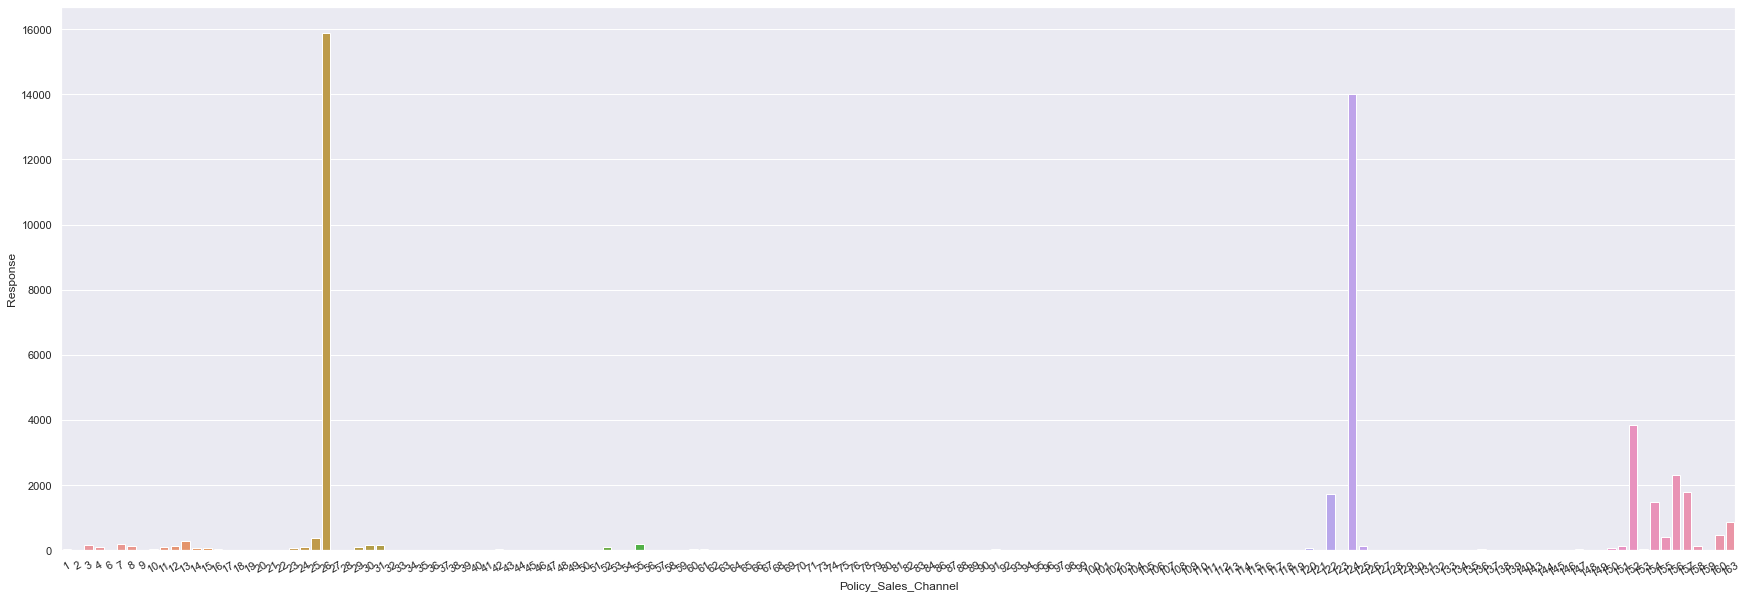

In [32]:
# Policy Sales Chanel
plt.figure(figsize=[30,10])
aux00 = df4[['Policy_Sales_Channel','Response']].groupby('Policy_Sales_Channel').sum().reset_index()
sns.barplot(x='Policy_Sales_Channel', y='Response', data=aux00)
plt.xticks(rotation=30);

# 5.0 Data Preparation

- Como os dados de testes já foram dados, podemos fazer a divisão entre dados de treino e validação. Ao analisar as métricas do modelo com os dados de validação, estaremos observando o potencial de aprendizado do modelo, e ao analisar as métricas do modelo quando utilizamos os dados de teste (Dados equivalentes aos de produção) estaremos observando o potencial de generalização do modelo.

## 5.1 Treino e validação

In [33]:
df5 = df4.copy()

In [34]:
X = df4.drop('Response', axis=1)
Y = df4['Response'].copy()

x_train, x_val , y_train, y_val = ms.train_test_split( X, Y, test_size=0.2, random_state=70)

df5 = pd.concat([x_train, y_train], axis=1)
df5 = df5.reset_index(drop=True)

df_val = pd.concat([x_val, y_val], axis=1)
df_val = df_val.reset_index(drop=True)

## 5.2 Transformations / encoding

### Standartization

In [35]:
# Annual_Premium
ss = pp.StandardScaler()

df5['Annual_Premium'] = ss.fit_transform(df5[['Annual_Premium']].values)


### Rescaling

In [36]:
mms_age = pp.MinMaxScaler()
# Age
df5['Age'] = mms_age.fit_transform(df5[['Age']].values)

mms_vintage = pp.MinMaxScaler()
# Vintage

df5['Vintage'] = mms_vintage.fit_transform(df5[['Vintage']].values)

### Encoding

In [37]:
# Region_code - Frequency Encoding / Target encoding (Média) / Weighted Target encoding 
fe_region_code = df5.groupby('Region_Code').size() / len(df5)
df5['Region_Code'] = df5['Region_Code'].map(fe_region_code)

# Gender - Label encoding
df5['Gender'] = df5['Gender'].map({'Male':0,'Female':1})

# Vehicle_Age - One Hot Encoding / Order encoding / Frequency encoding
ohe = pp.OneHotEncoder(sparse= False)
ohe_df =ohe.fit_transform(df5[['Vehicle_Age']])
ohe_df = pd.DataFrame(columns = ['vehicle_age_between_1_2_year','vehicle_age_below_1_year','vehicle_age_over_2_year'],data= ohe_df)
df5 = pd.concat([df5,ohe_df], axis=1)
df5 = df5.drop('Vehicle_Age',axis=1)
#df5 = pd.get_dummies(df5, columns=['Vehicle_Age'])

# Vehicle_Damage - Label encoding
df5['Vehicle_Damage'] = df5['Vehicle_Damage'].map({'No':0,'Yes':1})

# Policy_Sales_Channel - Frequency Encoding / Target encoding (Média)
fe_policy_sales_channel = df5.groupby('Policy_Sales_Channel').size() / len(df5)
df5['Policy_Sales_Channel'] = df5['Policy_Sales_Channel'].map(fe_policy_sales_channel)


## 5.3 Validation Preparation

In [38]:
# Annual Premium 
df_val['Annual_Premium'] = ss.transform(df_val[['Annual_Premium']].values)

# Age
df_val['Age'] = mms_age.transform(df_val[['Age']].values)

# Vintage
df_val['Vintage'] = mms_vintage.transform(df_val[['Vintage']].values)

# Region_code - Frequency Encoding / Target encoding (Média) / Weighted Target encoding 
df_val['Region_Code'] = df_val['Region_Code'].map(fe_region_code)

# Gender - Label encoding
df_val['Gender'] = df_val['Gender'].map({'Male':0,'Female':1})


# Vehicle_Age - One Hot Encoding / Order encoding / Frequency encoding
ohe_val =ohe.transform(df_val[['Vehicle_Age']])
ohe_val = pd.DataFrame(columns = ['vehicle_age_between_1_2_year','vehicle_age_below_1_year','vehicle_age_over_2_year'],data= ohe_val)
df_val = pd.concat([df_val,ohe_val],axis=1)
df_val = df_val.drop('Vehicle_Age',axis=1)
#x_val = pd.get_dummies(x_val, columns=['Vehicle_Age'])


# Vehicle_Damage - Label encoding
df_val['Vehicle_Damage'] = df_val['Vehicle_Damage'].map({'No':0,'Yes':1})

# Policy_Sales_Channel - Frequency Encoding / Target encoding (Média)
df_val['Policy_Sales_Channel'] = df_val['Policy_Sales_Channel'].map(fe_policy_sales_channel)

# 6.0 Selected Features

## 6.1 Features Importance

In [39]:
# model definition
forest = en.ExtraTreesClassifier( n_estimators=100, random_state=42, n_jobs= -1)

# Data preparation
x_train_n = df5.drop(['id', 'Response'], axis=1 )
y_train_n = df5[['Response']].values

forest.fit(x_train_n, y_train_n)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

Feature Ranking: 
                        Feature  Importance
0                       Vintage    0.275945
0                Annual_Premium    0.248259
0                           Age    0.168037
0                   Region_Code    0.095753
0                Vehicle_Damage    0.080203
0          Policy_Sales_Channel    0.062556
0            Previously_Insured    0.043297
0      vehicle_age_below_1_year    0.014109
0                        Gender    0.004967
0  vehicle_age_between_1_2_year    0.004813
0       vehicle_age_over_2_year    0.001567
0               Driving_License    0.000495


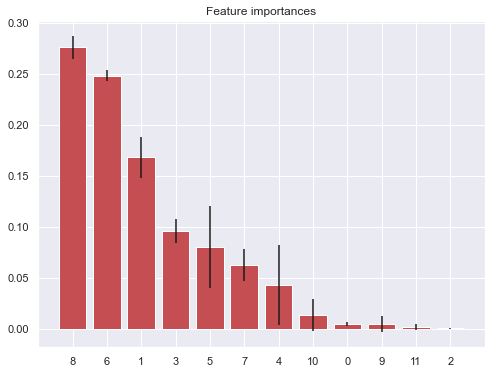

In [46]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]


#Print feature ranking
print("Feature Ranking: ")
df = pd.DataFrame()

for i, j in zip(x_train_n, forest.feature_importances_ ):
    aux = pd.DataFrame ({'Feature':i, "Importance": j}, index=[0])
    df = pd.concat([df, aux], axis=0)
    
print(df.sort_values('Importance', ascending=False ))

#Plot the impurity-based feature importance of the forest

plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train_n.shape[1]), importances[indices], color='r', yerr=std[indices], align="center")
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

In [58]:
# Columns selected from feature importances and EDA
cols_selected = ["Vintage", "Annual_Premium", "Age", "Region_Code", "Vehicle_Damage","Gender","Policy_Sales_Channel"]

x_train = df5[cols_selected]
y_train = df5['Response']

x_val = df_val[cols_selected]
y_val = df_val['Response']

# 7.0 Build Modeling

## 7.1 Logistic Regression

In [65]:
# model definition
lr_model = lm.LogisticRegression( random_state=42 ) 

# model training
lr_model.fit( x_train, y_train )

# model prediction
yhat_lr = lr_model.predict_proba( x_val )

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

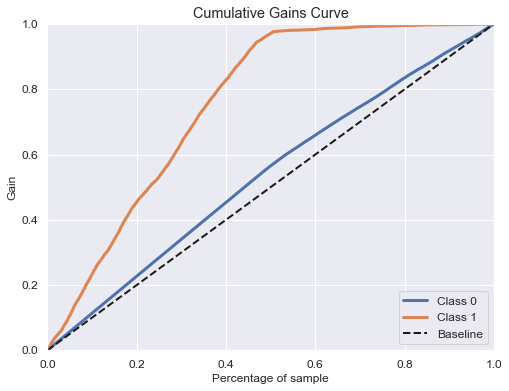

In [70]:
# Accumulative Gain
#plt.figure(figsize=[20,10])
#plt.subplot(1,2,1)
skplt.metrics.plot_cumulative_gain( y_val, yhat_lr )

#Scikitplot library is there to help
#plt.subplot(1,2,2)
#skplt.metrics.plot_lift_curve( y_val, yhat_lr );

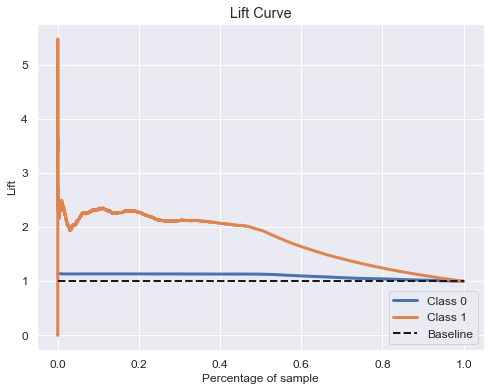

In [71]:
skplt.metrics.plot_lift_curve( y_val, yhat_lr );

## 7.2 KNN

In [61]:
# model definition
knn_model = nh.KNeighborsClassifier( n_neighbors=5 )

# model training
knn_model.fit( x_train, y_train )

# model prediction
yhat_knn = knn_model.predict_proba( x_val )

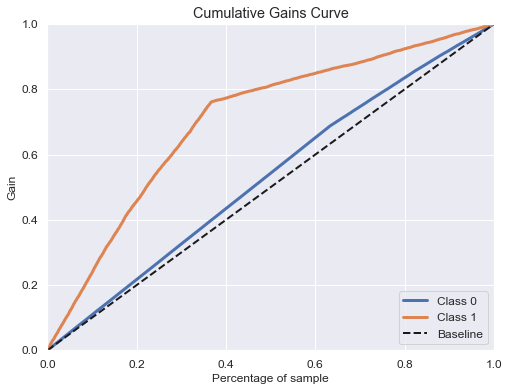

In [62]:
# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn );

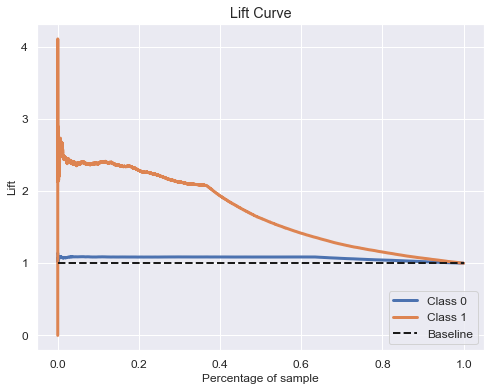

In [72]:
#Scikitplot library is there to help
skplt.metrics.plot_lift_curve( y_val, yhat_knn );

## 7.3 Random Forest

In [81]:
# model definition
rf = en.RandomForestClassifier( n_estimators=500, n_jobs=-1, random_state=42 ) 

# model training
rf.fit( x_train, y_train )

# model prediction
yhat_rf = rf.predict_proba( x_val )

yhat_rf_predict = rf.predict(x_val)

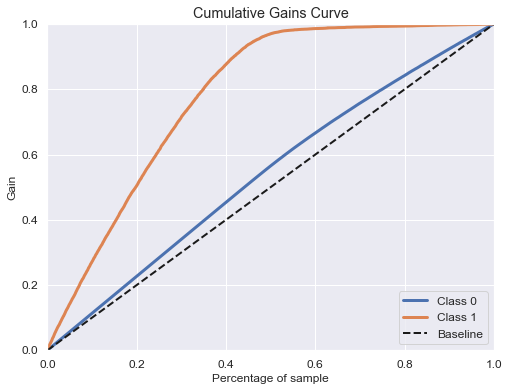

In [82]:
# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_rf );

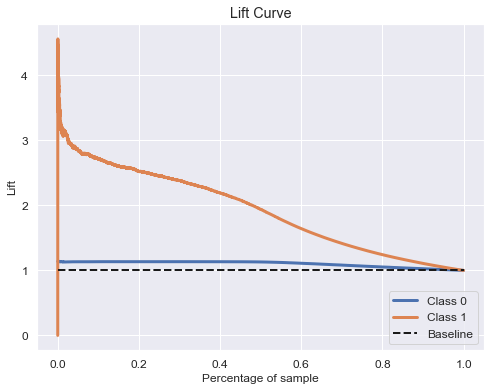

In [83]:
#Scikitplot library is there to help
skplt.metrics.plot_lift_curve( y_val, yhat_rf );

# 8.0 Fine Tuning

# 9.0 Business Metrics

* 3 tipos de Curva para problemas de classificação Learn to rank
    - Curva de ganho: Essa curva demonstra X% da base de clientes, ordenados pela probabilidade de compra, contém Y% de todos os interessados no novo produto.
    - Curva lift: Essa curva demonstra o quanto o modelo é superior ao efeito da aleatoriedade (cenário em que a empresa faria se não tivesse o modelo)
    - Curva ROI: Retorno sobre o investimento



* Métricas Top K: Métricas utilizadas para medição de performance do modelo em ordenação

    - Precision Top K
    - Recall Top K
    - F1-Metric Top K
    - Avarege Precision Top K
 

## 9.1 Quanto de receita o modelo pode ganhar em relação a um modelo aleatório?

* Será adotado um valor médio de R$ 5.000,00 para cada apólice adquirida por um cliente

* Por causa de custo, apenas 20000 pessoas poderão ser ligadas.


 * O valor do prêmio será de até R$ 100.000,00 com a probabilidade de haver apenas 1 pessoa ganhadora a cada 100 clientes

In [92]:
df_val['yhat_rf_predict_proba'] = yhat_rf[:,1]
df_val['yhat_rf_predict'] = yhat_rf_predict
df_val = df_val.sort_values('yhat_rf_predict_proba', ascending=False)
df9 = df_val[['id','Response','yhat_rf_predict']]
df9 = df9.reset_index(drop=True)

### Custo / retorno (R$)

* O custo estimado para a operação comercial de atendentes é de R$ 10.000,00. Sabendo que eu tenho um custo de 2 reais para cada ligação, logo o limite de pessoas que posso está ligando é 20000 pessoas.


* 20000 pessoas representa 26% da minha base de dados, é a partir desse percentual que eu devo selecionar qual a melhor curva acumulativa que obtive a partir dos modelos treinados.



In [98]:
20000/len(df_val)

0.2623914355435439

In [94]:
x = df9[:20000]

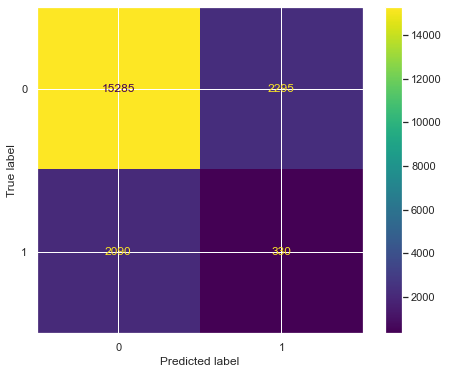

In [101]:
cm = m.confusion_matrix(x['Response'], x['yhat_rf_predict'])
disp = m.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### RESULTADO

In [108]:
# Qtd de pessoas que comprariam x valor da apólice 
receita_model = 330*5000

# Custo de operação + custo de prêmio (Pior cenário com valor máximo) + Custo de modelo e time
custo_operacao = 10000 
custo_premio = 3*100000
custo_model_time = 100000
custo_total = custo_operacao + custo_premio + custo_model_time

# Lucro = Receita - Custo

lucro = receita_model - custo_total

# Ganho em cima do modelo aleatório dado pela curva lift
lucro_model_aleatorio = lucro / 2.4

ganho_model_vs_aleatoriedade = lucro - lucro_model_aleatorio

print("Esse projeto teve um retorno de R$ {:,.2f}\n\n".format(lucro))

print("O ganho desse projeto em relação a uma operação feita ao acaso pode ser dado a partir da curva lift do modelo escolhido, \nportanto temos a estimativa de um retorno acima da operação aletória de R${:,.2f}".format(ganho_model_vs_aleatoriedade))

Esse projeto teve um retorno de R$ 1,240,000.00


O ganho desse projeto em relação a uma operação feita ao acaso pode ser dado a partir da curva lift do modelo escolhido, 
portanto temos a estimativa de um retorno acima da operação aletória de R$723,333.33


# 10.0 Deployment model